# Assignment 6. K Means
## Introduction
We are using the dataset https://www.kaggle.com/hellbuoy/online-retail-customer-clustering to perform a RFM (Recency, Frequency, Monetary Value) method. This method allows to divide customers into clusters based on the attributes above.
## Step 1. Importing the necessary libraries

In [1]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from scipy.stats import mode

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Step 2. Preparing the data.
We are loading the dataframe and discarding the rows with missing values.

In [45]:
df = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1", parse_dates=["InvoiceDate"]).dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


### Step 2.1
Creating a table for a difference between the most recent transaction and all other transactions. This is the recency attribute.

In [25]:
maxdate = max(df['InvoiceDate'])
df['DateDiff'] = maxdate-df['InvoiceDate']
recency = df.groupby('CustomerID')['DateDiff'].min().reset_index()
recency['DateDiff'] = recency['DateDiff'].dt.days
recency.head()

,CustomerID,DateDiff
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


### Step 2.2
Creating a table for the amount of invoices for every customer. This is the frequency attribute.

In [23]:
frequency = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


### Step 2.3
Creating a table for the total amount of purchases by each customer. This is the monetary value attribute.

In [14]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary.head()

,CustomerID,TotalPrice
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


### Step 2.4
Merging all the attributes into one dataframe.

In [38]:
rfm = pd.merge(recency, frequency, on='CustomerID', how='inner').merge(monetary, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40


## Step 3. Applying the K Means model.
### Step 3.1
Using the elbow method to find the optimal parameter k.

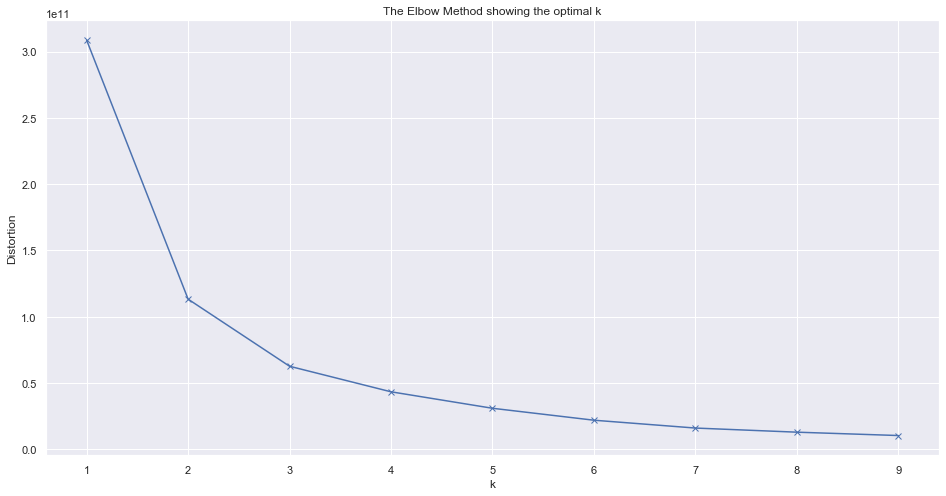

In [39]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(rfm)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We have chosen to divide our data into 3 clusters.
### Step 3.2. Fitting the model.

In [40]:
model = KMeans(n_clusters=3, max_iter=50)
model.fit(rfm)
rfm['Cluster'] = model.labels_
rfm

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,2,0.00,0
1,12347.0,40,182,4310.00,0
2,12348.0,76,31,1797.24,0
3,12349.0,19,73,1757.55,0
4,12350.0,311,17,334.40,0
...,...,...,...,...,...
4367,18280.0,160,10,180.60,0
4368,18281.0,4,7,80.82,0
4369,18282.0,93,13,176.60,0
4370,18283.0,10,756,2094.88,0


## Step 4. Visualising and analysing the findings.

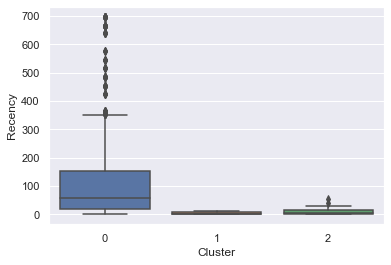

In [42]:
sns.boxplot(x='Cluster', y='Recency', data=rfm)

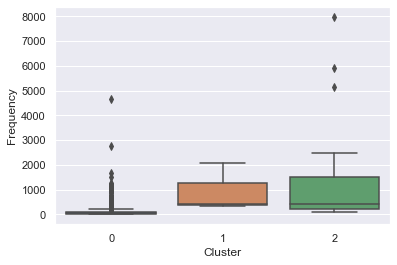

In [43]:
sns.boxplot(x='Cluster', y='Frequency', data=rfm)

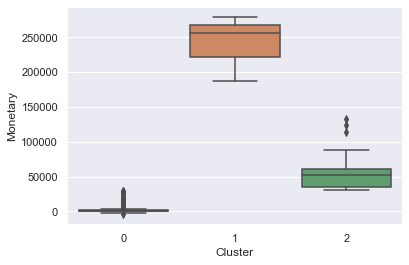

In [44]:
sns.boxplot(x='Cluster', y='Monetary', data=rfm)

We can see the customers in cluster 0 usually do not have recent purchases compared to the other clusters. Customers from cluster 0 do not have many purchases, neither have they spent a lot of money. Customers from cluster 1 and 2 are rather similar. In both clusters the latest purchases are recent and there are many purchases. However, customers from cluster 1 have spent much more money than customers from cluster 2. I would say that the customers from cluster 1 are the most important customers of the company, as they have made recent purchases and spent a lot of money.

### Can we apply supervised learning?
I do not think so. We do not know what the result of our clustering should be. The clusters that we divide the customers in are artificial.